In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [17]:
my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def acc_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    acc = accuracy_score(pred, actual)
    my_predictions[name_] = acc

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=False)
    
    df = pd.DataFrame(y_value, columns=['model', 'acc'])
    print(df)
    min_ = df['acc'].min() - 10
    max_ = df['acc'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['acc'])
    
    for i, v in enumerate(df['acc']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('Accuracy Score', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

In [5]:
df_grain = pd.read_csv('작물추천_min_max_추가_데이터타입변경(코코아,밀 추가).csv')
df_grain.head() 

,Unnamed: 0,temperature,rainfall,temp_min,temp_max,label
0,0,20.879744,202.935536,18,28,rice
1,1,21.770462,226.655537,18,28,rice
2,2,23.004459,263.964248,18,28,rice
3,3,26.491096,242.864034,18,28,rice
4,4,20.130175,262.717340,18,28,rice


In [6]:
del df_grain['Unnamed: 0']
df_grain.head()

,temperature,rainfall,temp_min,temp_max,label
0,20.879744,202.935536,18,28,rice
1,21.770462,226.655537,18,28,rice
2,23.004459,263.964248,18,28,rice
3,26.491096,242.864034,18,28,rice
4,20.130175,262.717340,18,28,rice


In [9]:
scaler = MinMaxScaler()

In [10]:
grain_scaled = scaler.fit_transform(df_grain[df_grain.columns[:-1]])
X_train, X_test, y_train, y_test = train_test_split(
    grain_scaled, df_grain[df_grain.columns[-1]], stratify=df_grain[df_grain.columns[-1]],
    test_size=0.2
)

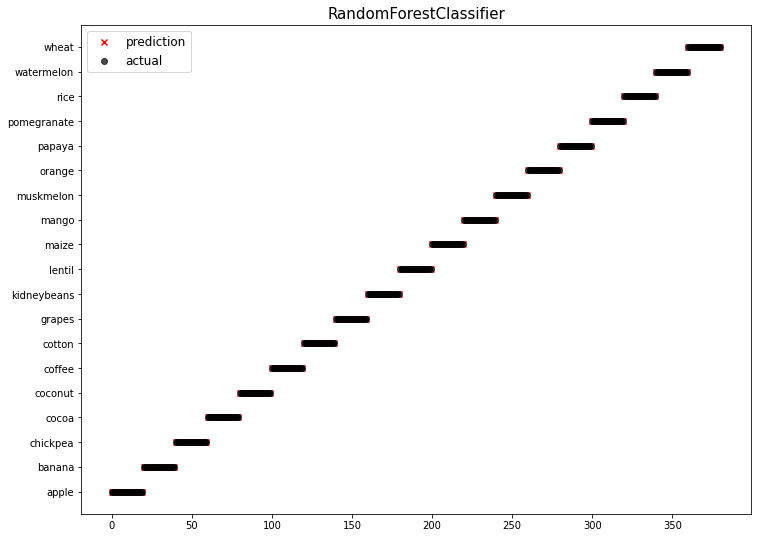

                    model  acc
0  RandomForestClassifier  1.0


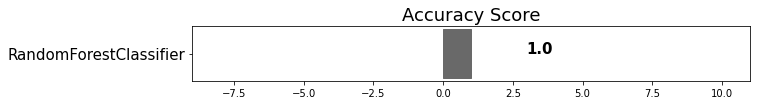

In [18]:
rfc = RandomForestClassifier(random_state=2022)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
acc_eval('RandomForestClassifier', pred, y_test)

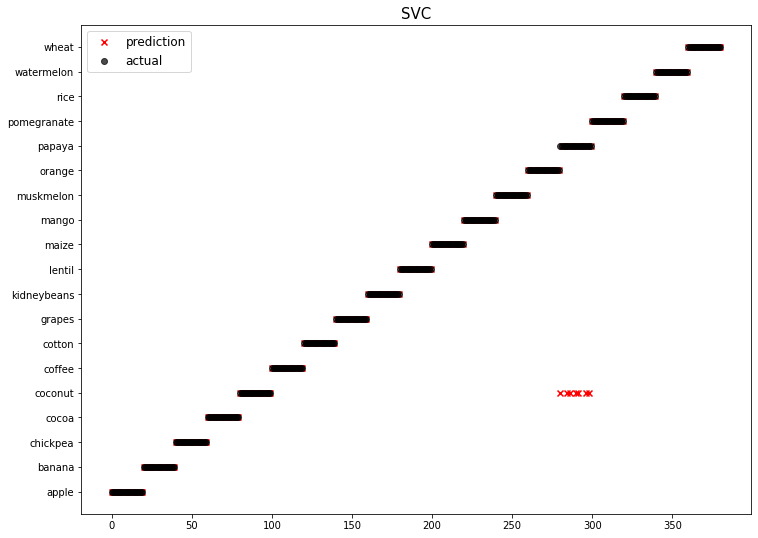

                    model       acc
0                     SVC  0.981627
1  RandomForestClassifier  1.000000


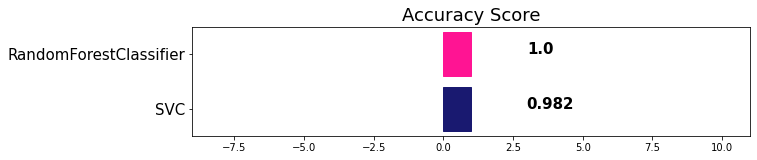

In [19]:
svc = SVC(random_state=2022)
svc.fit(X_train, y_train)
pred = svc.predict(X_test)
acc_eval('SVC', pred, y_test)

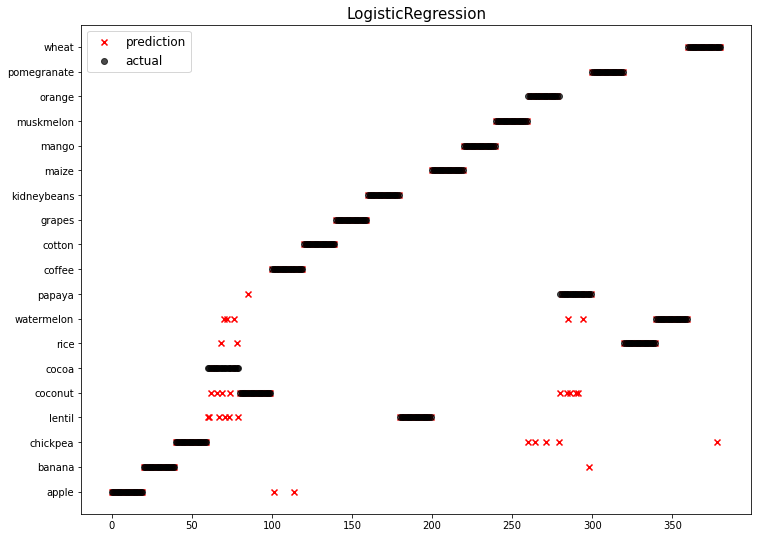

                    model       acc
0      LogisticRegression  0.918635
1                     SVC  0.981627
2  RandomForestClassifier  1.000000


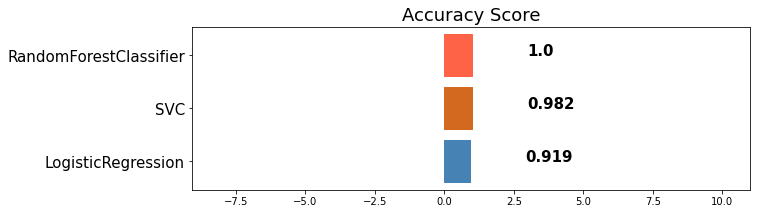

In [20]:
lrc = LogisticRegression(random_state=2022)
lrc.fit(X_train, y_train)
pred = lrc.predict(X_test)
acc_eval('LogisticRegression', pred, y_test)

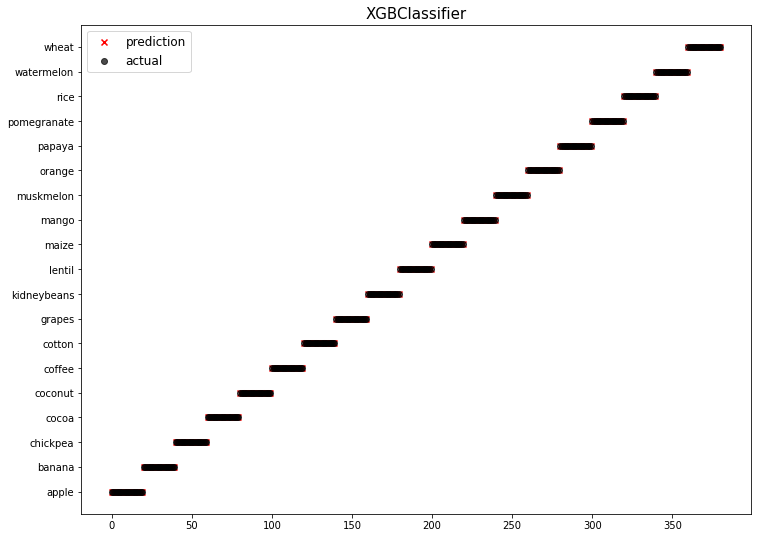

                    model       acc
0      LogisticRegression  0.918635
1                     SVC  0.981627
2  RandomForestClassifier  1.000000
3           XGBClassifier  1.000000


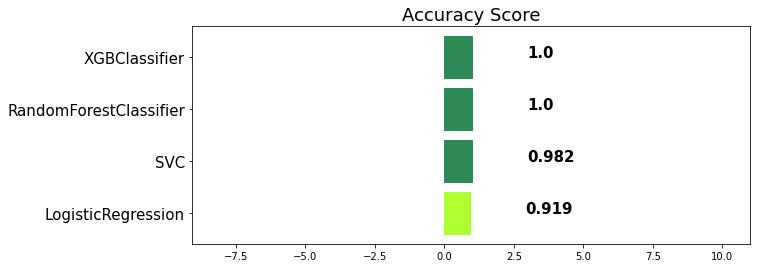

In [24]:
xgb = XGBClassifier(random_state=2022)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
acc_eval('XGBClassifier', pred, y_test)

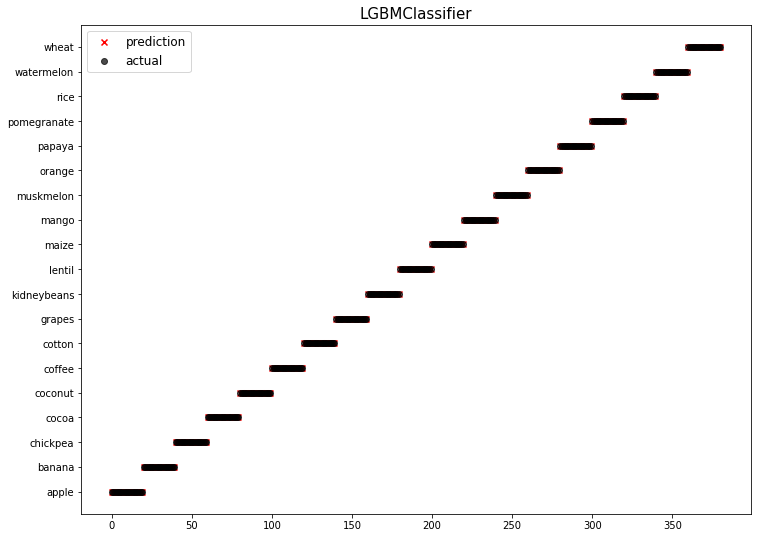

                    model       acc
0      LogisticRegression  0.918635
1                     SVC  0.981627
2  RandomForestClassifier  1.000000
3           XGBClassifier  1.000000
4          LGBMClassifier  1.000000


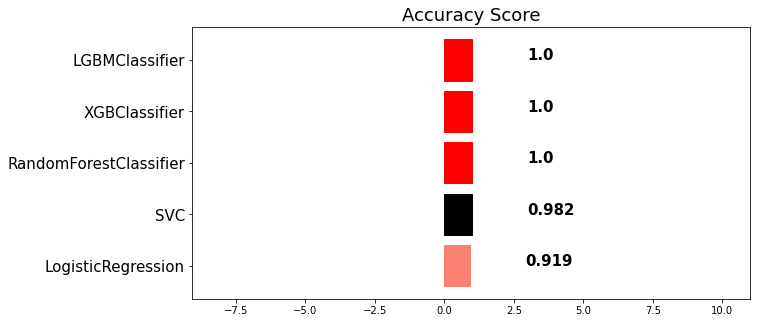

In [25]:
lgb = LGBMClassifier(random_state=2022)
lgb.fit(X_train, y_train)
pred = lgb.predict(X_test)
acc_eval('LGBMClassifier', pred, y_test)